## Student Grades Prediction 

In [2]:
#Importing the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [5]:
df.columns 

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [6]:
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)


In [7]:
df.columns 

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'CGPA'],
      dtype='object')

In [8]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


### Treating missing values 

In [10]:
missingdata=df.isnull()


In [11]:
for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("")   

Seat No.
False    571
Name: Seat No., dtype: int64

PH-121
False    571
Name: PH-121, dtype: int64

HS-101
False    571
Name: HS-101, dtype: int64

CY-105
False    570
True       1
Name: CY-105, dtype: int64

HS-105
False    570
True       1
Name: HS-105, dtype: int64

MT-111
False    569
True       2
Name: MT-111, dtype: int64

CS-105
False    571
Name: CS-105, dtype: int64

CS-106
False    569
True       2
Name: CS-106, dtype: int64

EL-102
False    569
True       2
Name: EL-102, dtype: int64

EE-119
False    569
True       2
Name: EE-119, dtype: int64

ME-107
False    569
True       2
Name: ME-107, dtype: int64

CS-107
False    569
True       2
Name: CS-107, dtype: int64

HS-205
False    566
True       5
Name: HS-205, dtype: int64

MT-222
False    566
True       5
Name: MT-222, dtype: int64

EE-222
False    564
True       7
Name: EE-222, dtype: int64

MT-224
False    564
True       7
Name: MT-224, dtype: int64

CS-210
False    564
True       7
Name: CS-210, dtype: int64

CS-211
Fals

In [12]:
df[df['HS-205'].isnull()]

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493
137,CS-97138,C-,C+,WU,WU,WU,B,WU,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653
142,CS-97143,C+,B-,B,A-,A,A-,C,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.943
143,CS-97144,D,D,WU,WU,WU,D,WU,WU,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800


In [13]:
df_most_common_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [14]:
#confirming all null values are reduced 

for column in df_most_common_imputed.isnull().columns.values.tolist():
    print(column)
    print (df_most_common_imputed.isnull()[column].value_counts())
    print("")

Seat No.
False    571
Name: Seat No., dtype: int64

PH-121
False    571
Name: PH-121, dtype: int64

HS-101
False    571
Name: HS-101, dtype: int64

CY-105
False    571
Name: CY-105, dtype: int64

HS-105
False    571
Name: HS-105, dtype: int64

MT-111
False    571
Name: MT-111, dtype: int64

CS-105
False    571
Name: CS-105, dtype: int64

CS-106
False    571
Name: CS-106, dtype: int64

EL-102
False    571
Name: EL-102, dtype: int64

EE-119
False    571
Name: EE-119, dtype: int64

ME-107
False    571
Name: ME-107, dtype: int64

CS-107
False    571
Name: CS-107, dtype: int64

HS-205
False    571
Name: HS-205, dtype: int64

MT-222
False    571
Name: MT-222, dtype: int64

EE-222
False    571
Name: EE-222, dtype: int64

MT-224
False    571
Name: MT-224, dtype: int64

CS-210
False    571
Name: CS-210, dtype: int64

CS-211
False    571
Name: CS-211, dtype: int64

CS-203
False    571
Name: CS-203, dtype: int64

CS-214
False    571
Name: CS-214, dtype: int64

EE-217
False    571
Name: EE-217, dt

In [15]:
#Comparing value counts before and after 

for i in df.columns:
    x = df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: Seat No. and it value is:
 CS-97175    1
CS-97103    1
CS-97548    1
CS-97164    1
CS-97381    1
           ..
CS-97516    1
CS-97454    1
CS-97004    1
CS-97124    1
CS-97520    1
Name: Seat No., Length: 571, dtype: int64

Column name is: PH-121 and it value is:
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
A+     22
D+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     177
A-    120
B+     50
B      49
B-     42
A+     31
D      31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

Column name is: HS-105 and it value is:
 A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
A+    34
D+    34
WU     2
F      1
Name: HS-105, dtype: int64

In [16]:
#Removing records with inconsistent grades 

DF=df_most_common_imputed   
for i in DF.columns:
    DF.drop(DF[(DF.loc[:,i]=='WU')| (DF.loc[:,i]=='W')].index,inplace=True)


In [17]:
DF.reset_index(drop=True,inplace=True)

In [18]:
DF

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
543,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
544,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
545,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [19]:
#confirming romoval 

for column in DF.columns.values.tolist():
    print(column)
    print (DF[column].isin(['WU','W']).value_counts())
    print("")

Seat No.
False    547
Name: Seat No., dtype: int64

PH-121
False    547
Name: PH-121, dtype: int64

HS-101
False    547
Name: HS-101, dtype: int64

CY-105
False    547
Name: CY-105, dtype: int64

HS-105
False    547
Name: HS-105, dtype: int64

MT-111
False    547
Name: MT-111, dtype: int64

CS-105
False    547
Name: CS-105, dtype: int64

CS-106
False    547
Name: CS-106, dtype: int64

EL-102
False    547
Name: EL-102, dtype: int64

EE-119
False    547
Name: EE-119, dtype: int64

ME-107
False    547
Name: ME-107, dtype: int64

CS-107
False    547
Name: CS-107, dtype: int64

HS-205
False    547
Name: HS-205, dtype: int64

MT-222
False    547
Name: MT-222, dtype: int64

EE-222
False    547
Name: EE-222, dtype: int64

MT-224
False    547
Name: MT-224, dtype: int64

CS-210
False    547
Name: CS-210, dtype: int64

CS-211
False    547
Name: CS-211, dtype: int64

CS-203
False    547
Name: CS-203, dtype: int64

CS-214
False    547
Name: CS-214, dtype: int64

EE-217
False    547
Name: EE-217, dt

In [20]:
DF['PH-121'].unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'A+', 'F'],
      dtype=object)

### Encoding categorical values 

In [21]:
for column in DF.columns:
    
    DF[column]=DF[column].replace('A+',4.0)
    DF[column]=DF[column].replace('A',4.0)
    DF[column]=DF[column].replace('A-',3.7)
    DF[column]=DF[column].replace('B+',3.4)
    DF[column]=DF[column].replace('B',3.0)
    DF[column]=DF[column].replace('B-',2.7)
    DF[column]=DF[column].replace('C+',2.4)
    DF[column]=DF[column].replace('C',2.0)
    DF[column]=DF[column].replace('C-',1.7)
    DF[column]=DF[column].replace('D+',1.4)
    DF[column]=DF[column].replace('D',1.0)
    DF[column]=DF[column].replace('F',0.0)

In [22]:
DF.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [23]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Seat No.  547 non-null    object 
 1   PH-121    547 non-null    float64
 2   HS-101    547 non-null    float64
 3   CY-105    547 non-null    float64
 4   HS-105    547 non-null    float64
 5   MT-111    547 non-null    float64
 6   CS-105    547 non-null    float64
 7   CS-106    547 non-null    float64
 8   EL-102    547 non-null    float64
 9   EE-119    547 non-null    float64
 10  ME-107    547 non-null    float64
 11  CS-107    547 non-null    float64
 12  HS-205    547 non-null    float64
 13  MT-222    547 non-null    float64
 14  EE-222    547 non-null    float64
 15  MT-224    547 non-null    float64
 16  CS-210    547 non-null    float64
 17  CS-211    547 non-null    float64
 18  CS-203    547 non-null    float64
 19  CS-214    547 non-null    float64
 20  EE-217    547 non-null    float6

### Visualization correlataion by heatmap and further checking feature significance 



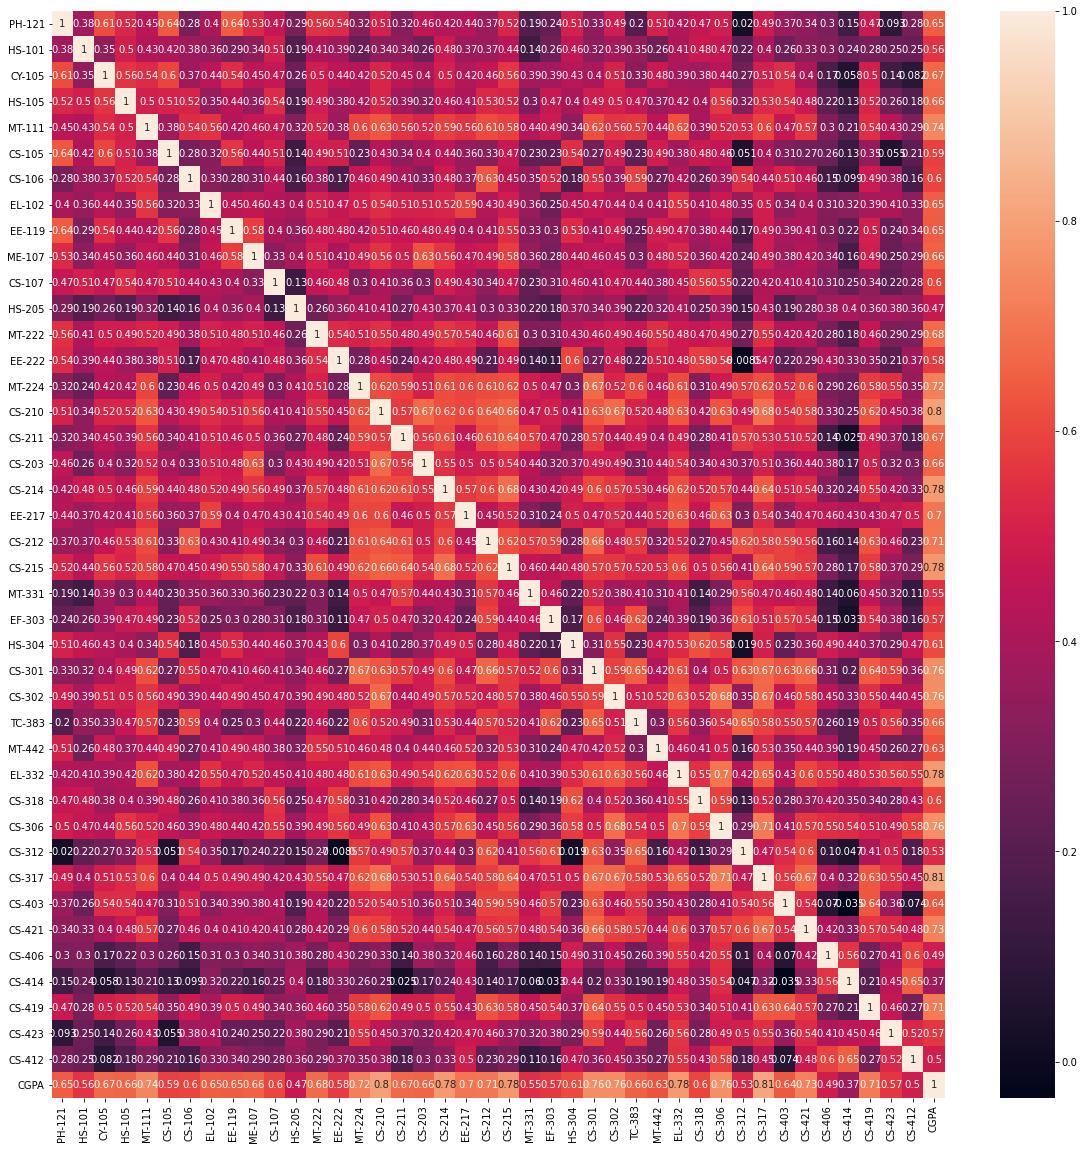

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(DF.corr(),annot=True)
plt.show()

In [25]:
Z=DF.drop(['CGPA'],axis='columns')
Z

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,CS-97567,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,3.4,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0
543,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.7,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7
544,CS-97569,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,...,3.4,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7
545,CS-97570,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,...,3.4,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


### Creating Models 

A) Linear Regression 

In [26]:
from sklearn.linear_model import LinearRegression
am = LinearRegression()
am

LinearRegression()

In [36]:
first_four_years=Z
for column in Z.columns[Z.columns.str.contains('-4')]:
    first_four_years.drop([column],axis='columns',inplace=True)

first_four_years

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,CS-97567,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,3.0,3.7,3.7,4.0,4.0,4.0,4.0,3.4,3.7,3.7
543,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,3.4,3.4
544,CS-97569,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,...,3.0,2.7,3.4,3.4,4.0,3.0,2.4,3.4,3.7,3.0
545,CS-97570,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,...,1.0,2.0,2.0,2.4,1.7,1.0,2.7,3.4,1.0,3.0


In [37]:
first_four_years.columns[first_four_years.columns.str.contains('-5')]

Index([], dtype='object')

In [38]:
first_four_years.shape

(547, 34)

In [42]:
am.fit(first_four_years.iloc[:,1:],DF['CGPA'])

LinearRegression()

In [47]:
Yhat=am.predict(first_four_years.iloc[:,1:])
Yhat[0:6]

array([2.15370365, 1.91168072, 3.55474112, 1.82410232, 3.46891893,
       3.10062851])

In [48]:
DF.loc[0:5,'CGPA']


0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
5    3.026
Name: CGPA, dtype: float64

C:\Users\sanku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sanku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


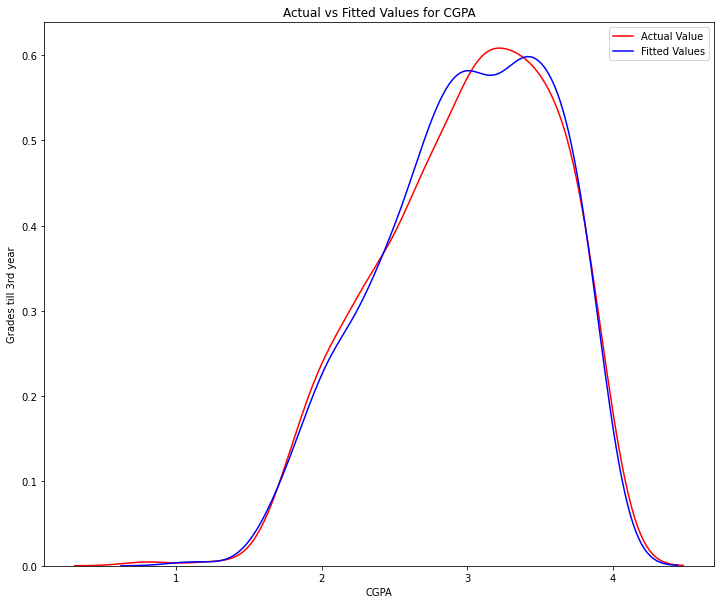

In [49]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(DF['CGPA'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for CGPA')
plt.xlabel('CGPA')
plt.ylabel('Grades till 3rd year')

plt.legend()
plt.show()
plt.close()

### R score & Mean Squared error of Linear Regression 

In [51]:
from sklearn.metrics import mean_squared_error
R_model1_lm=am.score(first_four_years.iloc[:,1:],DF['CGPA'])*100

mse_model1_lm = mean_squared_error(DF['CGPA'],Yhat)

In [52]:
print(" R^2: {:.2f} %".format(R_model1_lm))
print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model1_lm))

 R^2: 96.34 %
The mean square error of CGPA and predicted value is: 0.01261


### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

X_train,X_test,Y_train,Y_test = train_test_split(first_three_years.iloc[:,1:],DF[['CGPA']],test_size=0.40,random_state=0)
decisiontree = DecisionTreeRegressor()
dec_tree = decisiontree.fit(X_train, Y_train)

In [55]:
Yhat2=dec_tree.predict(X_test)

In [56]:
Yhat2[0:5]

array([2.851, 3.363, 2.343, 3.168, 2.775])

In [57]:
DF.loc[0:5,'CGPA']


0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
5    3.026
Name: CGPA, dtype: float64

### R score and MSE of decision tree

In [59]:
R_model1_DT=dec_tree.score(X_test,Y_test)*100

mse_model1_DT = mean_squared_error(Y_test,Yhat2)

In [60]:
print("Test set R^2: {:.2f} %".format(R_model1_DT))

print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model1_DT))

Test set R^2: 83.61 %
The mean square error of CGPA and predicted value is: 0.05818


## Final prediction of CGPA based on first three years 

In [61]:
first_three_years=first_four_years
for column in first_four_years.columns[first_four_years.columns.str.contains('-3')]:
    first_three_years.drop([column],axis='columns',inplace=True)
first_three_years
    

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.0,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,2.7,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.4,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,4.0,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,CS-97567,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.7
543,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,2.4,3.7,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
544,CS-97569,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,...,3.0,3.4,3.0,3.7,4.0,3.4,3.0,4.0,3.4,3.0
545,CS-97570,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,...,1.0,1.0,3.0,2.7,3.0,2.7,2.0,2.7,1.4,1.4


In [62]:
first_three_years.columns[first_three_years.columns.str.contains('-3')]

Index([], dtype='object')

### KNN

In [69]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(first_three_years.iloc[:,1:], DF['CGPA'],test_size=0.4 ,random_state=0)

In [71]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred=KNN.predict(X_test)

### SVM

In [72]:
from sklearn.svm import SVR
X_train,X_test,Y_train,Y_test = train_test_split(first_three_years.iloc[:,1:], DF['CGPA'],test_size=0.50,random_state=0)

In [73]:
sv = SVR(kernel='linear')
sv.fit(X_train, Y_train)

SVR(kernel='linear')

In [74]:
X_train.shape

(273, 22)

In [75]:
y_pred2 = sv.predict(X_test)

### R score & mean squared error of svm 

In [76]:
R_model2_SVM=sv.score(X_test, Y_test)*100
mse_model2_SVM = mean_squared_error(Y_test,y_pred2)

In [77]:
print("Test set R^2: {:.2f} %".format(R_model2_SVM))

print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model2_SVM))

Test set R^2: 94.53 %
The mean square error of CGPA and predicted value is: 0.01846


### Linear regression and Gaussian process model 3

In [82]:
first_two=first_three_years
for column in Z.columns[Z.columns.str.contains('-2')]:
    first_three_years.iloc[:,1:].drop([column],axis='columns',inplace=True)
first_two

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
542,CS-97567,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,4.0
543,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0
544,CS-97569,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,4.0
545,CS-97570,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,4.0


In [83]:
lm2 = LinearRegression()
lm2
lm2.fit(first_two.iloc[:,1:],DF['CGPA'])

LinearRegression()

In [86]:
pred=lm2.predict(first_two.iloc[:,1:])

In [88]:
R_model3_lr=lm2.score(first_two.iloc[:,1:], DF['CGPA'])*100
mse_model3_lr = mean_squared_error(DF['CGPA'],pred)

In [89]:
print(" R^2: {:.2f} %".format(R_model3_lr))

print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model3_lr))

 R^2: 84.30 %
The mean square error of CGPA and predicted value is: 0.05407


In [90]:
#Gaussian now 
from sklearn.gaussian_process.kernels import RBF
import sklearn.gaussian_process as gp


In [92]:
X_train,X_test,Y_train,Y_test = train_test_split(first_two.iloc[:,1:],DF[['CGPA']],test_size=0.40,random_state=0)

In [93]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

In [94]:
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

In [95]:
model.fit(X_train, Y_train)
params = model.kernel_.get_params()

In [96]:
pred2 = model.predict(X_test)

In [97]:
R_model3_GPR=model.score(X_test, Y_test)*100
mse_model3_GPR = mean_squared_error(Y_test,pred2)

In [98]:
print("Test set R^2: {:.2f} %".format(model.score(X_test, Y_test)*100))

print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model3_GPR))

Test set R^2: 85.73 %
The mean square error of CGPA and predicted value is: 0.05067
